In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates

import requests
import json
from pathlib import Path
import sys
import pickle

import time
from datetime import datetime
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model

%matplotlib inline

## Function to convert day number to day

In [2]:
def convert_day(num):
    if num == 1:
        return 'Monday'
    elif num == 2:
        return 'Tuesday'
    elif num == 3:
        return 'Wednesday'
    elif num == 4:
        return 'Thursday'
    elif num == 5:
        return 'Friday'
    elif num == 6:
        return 'Saturday'
    else:
        return 'Sunday'

## Function to convert Month number to Month

In [3]:
def convert_month(num):
    if num == 1:
        return 'January'
    elif num == 2:
        return 'February'
    elif num == 3:
        return 'March'
    elif num == 4:
        return 'April'
    elif num == 5:
        return 'May'
    elif num == 6:
        return 'June'
    elif num == 7:
        return 'July'
    elif num == 8:
        return 'August'
    elif num == 9:
        return 'September'
    elif num == 10:
        return 'October'
    elif num == 11:
        return 'November'
    else:
        return 'December'

In [4]:
#path to files
file_path_csv_weather = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\weather_info.csv')
file_path_csv_bike = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\bike_info.csv')

In [5]:
#Read files
df = pd.read_csv(file_path_csv_bike,index_col=False)
dfw = pd.read_csv(file_path_csv_weather,index_col=False)

In [6]:
#df.shape

In [7]:
#df.describe()

In [8]:
#df.dtypes

In [9]:
#dfw.shape

In [10]:
#dfw.describe()

In [11]:
#dfw.dtypes

In [12]:
#dfw.head(5)

In [13]:
#dfw['weather_main'].unique()

## Set up Time Parmeters - Bike and Weather

In [14]:
df["TIME"] = pd.to_datetime(df["creat_time"],format='%d/%m/%Y %H:%M')
df["YEAR"] = df["TIME"].dt.year
df["MONTH"] = df["TIME"].dt.month
df['Day_of_Week'] = df['TIME'].dt.dayofweek
df["DAY_num"] = df["TIME"].dt.day
df["HOUR"] = df["TIME"].dt.hour
df["MINUTE"] = df["TIME"].dt.minute

In [15]:
#df.dtypes

In [16]:
dfw["TIME"] = pd.to_datetime(dfw["creat_time"],format='%d/%m/%Y %H:%M')
dfw["sunrise"] = pd.to_datetime(dfw["sunrise"],format='%d/%m/%Y %H:%M')
dfw["sunset"] = pd.to_datetime(dfw["sunset"],format='%d/%m/%Y %H:%M')

dfw["YEAR"] = dfw["TIME"].dt.year
col =np.array(dfw["YEAR"],np.int64) #Converts float to int
dfw["YEAR"] = col #Converts float to int

dfw["MONTH"] = dfw["TIME"].dt.month
col =np.array(dfw["MONTH"] ,np.int64)
dfw["MONTH"]  = col

dfw['Day_of_Week'] = dfw['TIME'].dt.dayofweek
col =np.array(dfw['Day_of_Week'],np.int64) 
dfw['Day_of_Week'] = col 
dfw["DAY_num"] = dfw["TIME"].dt.day
col =np.array(dfw["DAY_num"],np.int64)
dfw["DAY_num"] = col

dfw["HOUR"] = dfw["TIME"].dt.hour
col =np.array(dfw["HOUR"] ,np.int64)
dfw["HOUR"]  = col

dfw["MINUTE"] = dfw["TIME"].dt.minute
col =np.array(dfw["MINUTE"] ,np.int64)
dfw["MINUTE"] = col

In [17]:
#dfw.dtypes

In [18]:
df.loc[df['Day_of_Week'] == 0, 'DAY'] = 'Mon'  
df.loc[df['Day_of_Week'] == 1, 'DAY'] = 'Tue'  
df.loc[df['Day_of_Week'] == 2, 'DAY'] = 'Wed'  
df.loc[df['Day_of_Week'] == 3, 'DAY'] = 'Thu'  
df.loc[df['Day_of_Week'] == 4, 'DAY'] = 'Fri' 
df.loc[df['Day_of_Week'] == 5, 'DAY'] = 'Sat' 
df.loc[df['Day_of_Week'] == 6, 'DAY'] = 'Sun' 
df["DAY"].unique()

array(['Wed', 'Thu', 'Sat', 'Tue', 'Mon', 'Sun', 'Fri'], dtype=object)

In [19]:
dfw.loc[dfw['Day_of_Week'] == 0, 'DAY'] = 'Mon'  
dfw.loc[dfw['Day_of_Week'] == 1, 'DAY'] = 'Tue'  
dfw.loc[dfw['Day_of_Week'] == 2, 'DAY'] = 'Wed'  
dfw.loc[dfw['Day_of_Week'] == 3, 'DAY'] = 'Thu'  
dfw.loc[dfw['Day_of_Week'] == 4, 'DAY'] = 'Fri' 
dfw.loc[dfw['Day_of_Week'] == 5, 'DAY'] = 'Sat' 
dfw.loc[dfw['Day_of_Week'] == 6, 'DAY'] = 'Sun' 
dfw["DAY"].unique()

array(['Mon', 'Wed', 'Sun', 'Thu', 'Sat', 'Fri', 'Tue'], dtype=object)

## Set up Search Parameters for Bike (Station ID, Day) 

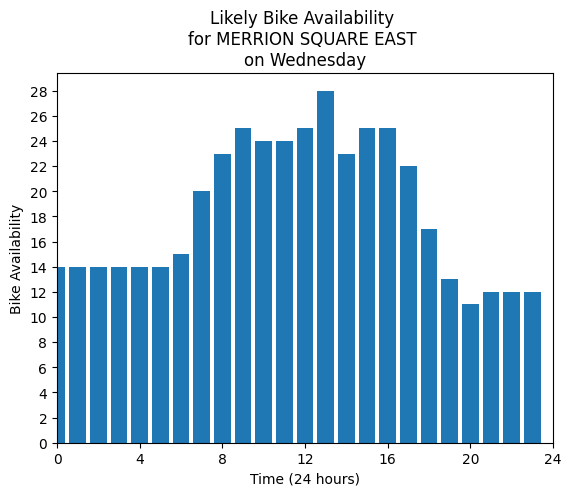

In [20]:
#Check Bike availability or Bike Parking Availability
req = 'b' #input("Do you want to check for Bike Availability (Type: b) or Parking Availability (Type: p): ")
if req == 'b' or req == 'B' or req == 'p' or req == 'P' or req == 'bike' or req == 'Bike' or req == 'park' or req == 'Park':

    #Month
    month_num = 3

    #Day of the week
    day_num = 4 #int(input("Enter Day Number (1 = Mon, 2 = Tues, 3 = Wed etc): "))
    
    #Hour
    hour_num = 12
    
    #Minute pass the hour
    #min_num = int(input("Enter Minute pass the hour (0 - 15 - 30 - 45): "))
    
    #Station ID
    stationid = 25 #int(input("Enter Station ID (1 to 117): "))

    try:
        stationname = df.loc[(df['number']==stationid),'name'].values[0]
        
        #Filter data based on certain input parameters
        df['station_select'] = (df['YEAR']==2023) & (df['MONTH']==month_num) & (df['Day_of_Week']==day_num-1) & (df['number']==stationid)
        
        ## Set up x- and y-axis of Plot
        x =df['HOUR'].loc[df['station_select']]

        if req == 'bike' or req == 'Bike' or req == 'b' or req == 'B':
            y = df['bike_available'].loc[df['station_select']]
            plt.ylabel("Bike Availability")
            plt.title(f'Likely Bike Availability \nfor {stationname} \non {convert_day(day_num-1)}')
            
        elif req == 'park' or req == 'Park' or req == 'p' or req == 'P':
            y = df['bike_stand_available'].loc[df['station_select']]
            plt.ylabel("Bike Parking Availability")
            plt.title(f'Likely Bike Parking Availability \nfor {stationname} \non {convert_day(day_num-1)}')
            print("OK")
       
        #Set Up Plot
        plt.xlabel("Time (24 hours)")
        ytick = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44])
        xtick = np.array([0,4,8,12,16,20,24])
        plt.xticks(xtick)
        plt.yticks(ytick)
        plt.xlim(0,24)
        plt.bar(x,y)
        plt.show()
    except:
        print ("Station ID Does not exist")
    
else:
    print("Incorrect Entry")

## Examine Weather Information

In [21]:
#Convert from Kelvin to Celcsius
dfw["temp"] = dfw["temp"]-273.15
dfw["temp_feel"] = dfw["temp_feel"]-273.15
#dfw["wind_speed"].unique()
dfw["weather_main"].unique()

array(['Clouds', 'Rain', 'Snow', 'Clear', 'Drizzle'], dtype=object)

In [22]:
dfw['temp_check'] = (dfw['temp']==0)
dfw["temp"].loc[dfw['temp_check']]

Series([], Name: temp, dtype: float64)

In [59]:
#Create new column putting numerical values to weather_main
dfw['weather_main'].replace(['Clouds', 'Rain','Snow','Clear','Drizzle'],[3, 4,5,1,2], inplace=True)
dfw["weather_main"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [60]:
dfw['time_select'] = (dfw['Day_of_Week']==day_num-1) & (dfw['MONTH']==month_num) #& (dfw["HOUR_w"] == hour_num)

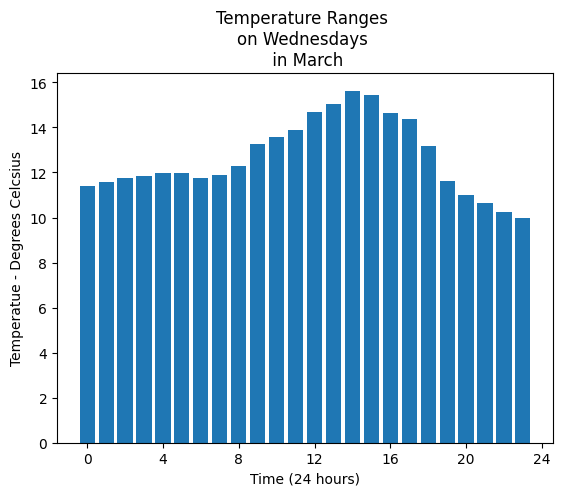

In [61]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["temp"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Temperature Ranges \non {convert_day(day_num-1)}s \n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Temperatue - Degrees Celcsius")
#ytick = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
#plt.yticks(ytick)
plt.bar(x,y)
plt.show()

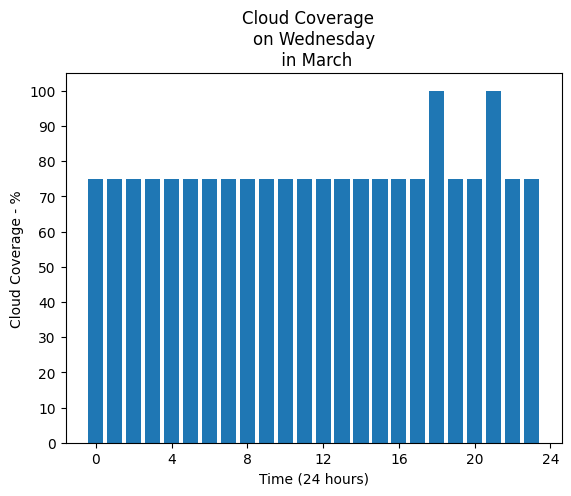

In [62]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["clouds"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Cloud Coverage  \non {convert_day(day_num-1)}\n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Cloud Coverage - %")
ytick = np.array([0,10,20,30,40,50,60,70,80,90,100])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
plt.yticks(ytick)
#plt.xlim(0,24)
plt.bar(x,y)
plt.show()

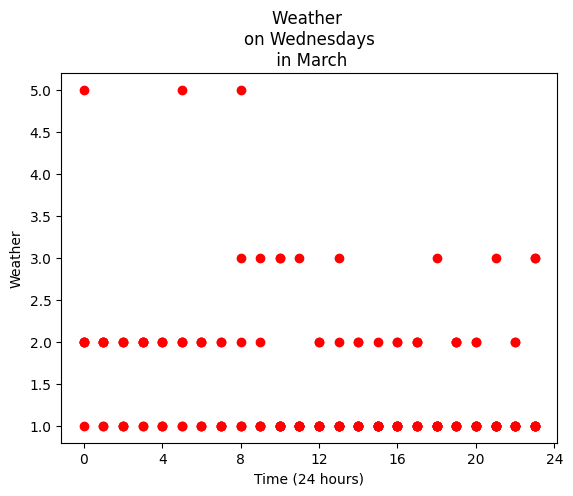

In [63]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["weather_main"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Weather \non {convert_day(day_num-1)}s\n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Weather")
#ytick = np.array([0,10,20,30,40,50,60,70,80,90,100])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
#plt.yticks(ytick)
#plt.xlim(0,24)
plt.scatter(x,y,color='red')
plt.show()

## Combine the two dataframes .........???

In [64]:
dfbikeweath = df.merge(dfw, on="TIME")
dfbikeweath.shape

(24101, 43)

In [77]:
dfbikeweath.columns

Index(['number', 'name', 'bike_stand', 'bike_stand_available',
       'bike_available', 'creat_time_x', 'TIME', 'YEAR_x', 'MONTH_x',
       'Day_of_Week_x', 'DAY_num_x', 'HOUR_x', 'MINUTE_x', 'DAY_x',
       'station_select', 'id_y', 'weather_id', 'weather_main', 'temp',
       'temp_feel', 'wind_speed', 'clouds', 'sunrise', 'sunset',
       'creat_time_y', 'YEAR_y', 'MONTH_y', 'Day_of_Week_y', 'DAY_num_y',
       'HOUR_y', 'MINUTE_y', 'DAY_y', 'temp_check', 'time_select'],
      dtype='object')

In [82]:
list(dfbikeweath.columns[:7]) + ['weather_main','temp']

['number',
 'name',
 'bike_stand',
 'bike_stand_available',
 'bike_available',
 'creat_time_x',
 'TIME',
 'weather_main',
 'temp']

In [84]:
dfbikeweath.head(10)[list(dfbikeweath.columns[:7]) + ['weather_main','temp']]

,number,name,bike_stand,bike_stand_available,bike_available,creat_time_x,TIME,weather_main,temp
0,20,JAMES STREET EAST,30,30,0,09/03/2023 19:27,2023-03-09 19:27:00,2,3.09
1,68,HANOVER QUAY,40,40,0,09/03/2023 19:27,2023-03-09 19:27:00,2,3.09
2,38,TALBOT STREET,40,22,18,09/03/2023 19:27,2023-03-09 19:27:00,2,3.09
3,51,YORK STREET WEST,40,37,3,09/03/2023 19:27,2023-03-09 19:27:00,2,3.09
4,93,HEUSTON STATION (CENTRAL),40,10,30,09/03/2023 19:27,2023-03-09 19:27:00,2,3.09
5,77,WOLFE TONE STREET,29,24,5,09/03/2023 19:27,2023-03-09 19:27:00,2,3.09
6,117,HANOVER QUAY EAST,40,39,1,09/03/2023 19:27,2023-03-09 19:27:00,2,3.09
7,108,AVONDALE ROAD,35,21,14,09/03/2023 19:27,2023-03-09 19:27:00,2,3.09
8,71,KEVIN STREET,40,36,4,09/03/2023 19:27,2023-03-09 19:27:00,2,3.09
9,25,MERRION SQUARE EAST,30,27,3,09/03/2023 19:27,2023-03-09 19:27:00,2,3.09


In [65]:
df.shape,dfw.shape

((723761, 21), (1061, 23))

In [66]:
dfbikeweath.describe().T

,count,mean,std,min,25%,50%,75%,max
#,24101.0,363190.482636,209997.101938,61.0000,182043.0000,363096.0000,546956.0000,723711.0000
number,24101.0,60.412638,43.290873,1.0000,29.0000,59.0000,89.0000,507.0000
bike_stand,24101.0,31.872287,7.666679,1.0000,29.0000,30.0000,40.0000,40.0000
bike_stand_available,24101.0,19.742500,11.080127,0.0000,11.0000,20.0000,28.0000,40.0000
bike_available,24101.0,11.739596,9.691588,0.0000,4.0000,10.0000,18.0000,40.0000
delete_flag_x,24101.0,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000
YEAR_x,24101.0,2023.000000,0.000000,2023.0000,2023.0000,2023.0000,2023.0000,2023.0000
MONTH_x,24101.0,3.000000,0.000000,3.0000,3.0000,3.0000,3.0000,3.0000
Day_of_Week_x,24101.0,2.956807,1.920819,0.0000,1.0000,3.0000,5.0000,6.0000
DAY_num_x,24101.0,12.481059,6.487852,2.0000,6.0000,12.0000,18.0000,24.0000


In [67]:
dfbikeweath.head()

,#,id_x,number,name,address,bike_stand,bike_stand_available,bike_available,status,last_update,...,delete_flag_y,YEAR_y,MONTH_y,Day_of_Week_y,DAY_num_y,HOUR_y,MINUTE_y,DAY_y,temp_check,time_select
0,61,0005a69485fd4846,20,JAMES STREET EAST,James Street East,30,30,0,OPEN,09/03/2023 19:18,...,0,2023,3,3,9,19,27,Thu,False,True
1,6889,027c49405f914f96,68,HANOVER QUAY,Hanover Quay,40,40,0,OPEN,09/03/2023 19:22,...,0,2023,3,3,9,19,27,Thu,False,True
2,33285,0bd9a84689594421,38,TALBOT STREET,Talbot Street,40,22,18,OPEN,09/03/2023 19:19,...,0,2023,3,3,9,19,27,Thu,False,True
3,33328,0bdeaea16e64492d,51,YORK STREET WEST,York Street West,40,37,3,OPEN,09/03/2023 19:21,...,0,2023,3,3,9,19,27,Thu,False,True
4,37570,0d5eb714cf404ebc,93,HEUSTON STATION (CENTRAL),Heuston Station (Central),40,10,30,OPEN,09/03/2023 19:19,...,0,2023,3,3,9,19,27,Thu,False,True


## Check if any missing values (NaN)

In [68]:
dfbikeweath.isna().sum().sum()

0

## Drop some of the unwanted columns 

In [69]:
dfbikeweath.drop(labels=['delete_flag_y','id_x','delete_flag_x','address','status','last_update','coord_lon','coord_lat','#'],axis=1,inplace=True)

In [70]:
#dfbikeweath.dtypes

## Split Data set to Train and Test

In [71]:
train_set,test_set = train_test_split(dfbikeweath,test_size=0.2,random_state=42)
train_set.shape,test_set.shape

((19280, 34), (4821, 34))

## Create a copy of Training set to carry out some preliminary analysis 

In [72]:
bikes = train_set.copy()
#bikes.dtypes

In [73]:
corr_matrix = bikes.corr()

C:\Users\corma\AppData\Local\Temp\ipykernel_1872\295380.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bikes.corr()


In [74]:
corr_matrix['bike_available'].sort_values(ascending = False)

bike_available          1.000000
bike_stand              0.228699
number                  0.029923
Day_of_Week_y           0.017747
Day_of_Week_x           0.017747
weather_main            0.016580
clouds                  0.014740
time_select             0.000615
MINUTE_x               -0.004738
MINUTE_y               -0.004738
station_select         -0.007265
wind_speed             -0.007683
HOUR_x                 -0.011705
HOUR_y                 -0.011705
DAY_num_x              -0.015629
DAY_num_y              -0.015629
weather_id             -0.015822
temp_feel              -0.017851
temp                   -0.018268
bike_stand_available   -0.686021
YEAR_x                       NaN
MONTH_x                      NaN
YEAR_y                       NaN
MONTH_y                      NaN
temp_check                   NaN
Name: bike_available, dtype: float64

## Correlation based on weather

In [75]:
bikes[['bike_available','weather_main','clouds','wind_speed','weather_id','temp_feel','temp']].corr()

,bike_available,weather_main,clouds,wind_speed,weather_id,temp_feel,temp
bike_available,1.000000,0.016580,0.014740,-0.007683,-0.015822,-0.017851,-0.018268
weather_main,0.016580,1.000000,0.221045,0.018268,-0.893304,-0.206920,-0.198771
clouds,0.014740,0.221045,1.000000,0.020678,-0.253018,0.009980,-0.017001
wind_speed,-0.007683,0.018268,0.020678,1.000000,-0.081389,0.212743,0.400228
weather_id,-0.015822,-0.893304,-0.253018,-0.081389,1.000000,0.231458,0.215783
temp_feel,-0.017851,-0.206920,0.009980,0.212743,0.231458,1.000000,0.967575
temp,-0.018268,-0.198771,-0.017001,0.400228,0.215783,0.967575,1.000000


<Axes: xlabel='temp', ylabel='bike_available'>

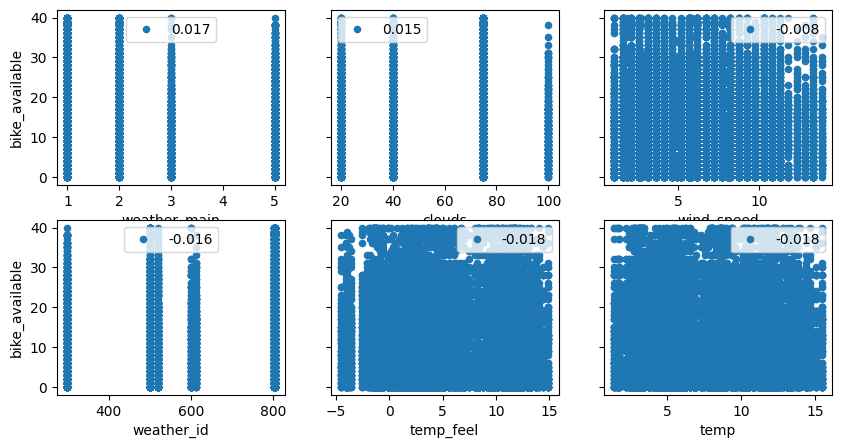

In [40]:
fig, axs = plt.subplots(2, 3, sharey=True)
bikes.plot(kind='scatter', x='weather_main', y='bike_available', label="%.3f" % bikes[['weather_main', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0][0], figsize=(10, 5))
bikes.plot(kind='scatter', x='clouds', y='bike_available', label="%.3f" % bikes[['clouds', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0][1])
bikes.plot(kind='scatter', x='wind_speed', y='bike_available', label="%.3f" % bikes[['wind_speed', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0][2])
bikes.plot(kind='scatter', x='weather_id', y='bike_available', label="%.3f" % bikes[['weather_id', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1][0])
bikes.plot(kind='scatter', x='temp_feel', y='bike_available', label="%.3f" % bikes[['temp_feel', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1][1])
bikes.plot(kind='scatter', x='temp', y='bike_available', label="%.3f" % bikes[['temp', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1][2])

## Correlation based on time

In [41]:
bikes[['bike_available','HOUR_x','DAY_num_x','MINUTE_x','Day_of_Week_x']].corr()

,bike_available,HOUR_x,DAY_num_x,MINUTE_x,Day_of_Week_x
bike_available,1.000000,-0.011705,-0.015629,-0.004738,0.017747
HOUR_x,-0.011705,1.000000,-0.151850,0.039567,0.067695
DAY_num_x,-0.015629,-0.151850,1.000000,-0.120986,-0.091672
MINUTE_x,-0.004738,0.039567,-0.120986,1.000000,-0.020108
Day_of_Week_x,0.017747,0.067695,-0.091672,-0.020108,1.000000


<Axes: xlabel='Day_of_Week_x', ylabel='bike_available'>

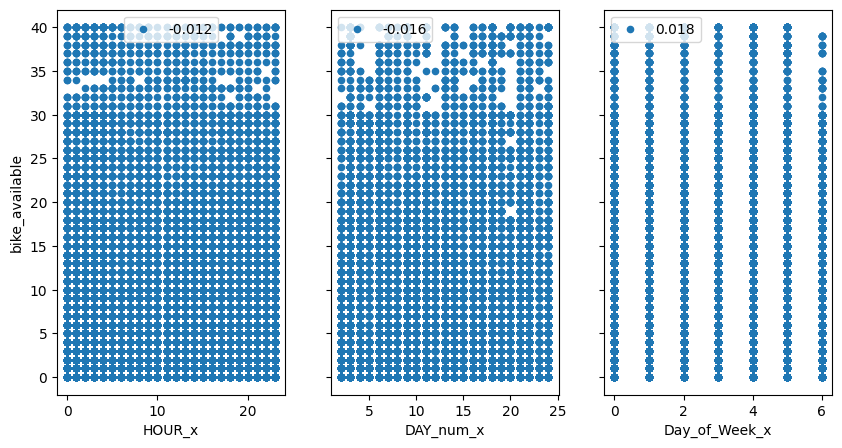

In [42]:
fig, axs = plt.subplots(1, 3, sharey=True)
bikes.plot(kind='scatter', x='HOUR_x', y='bike_available', label="%.3f" % bikes[['HOUR_x', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0], figsize=(10, 5))
bikes.plot(kind='scatter', x='DAY_num_x', y='bike_available', label="%.3f" % bikes[['DAY_num_x', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1], figsize=(10, 5))
bikes.plot(kind='scatter', x='Day_of_Week_x', y='bike_available', label="%.3f" % bikes[['Day_of_Week_x', 'bike_available']].corr().to_numpy()[0,1], ax=axs[2], figsize=(10, 5))

## Prepare Linear Regression inputs - choose single feature

In [43]:
features = ['weather_main','clouds','temp', 'weather_id', 'wind_speed','temp_feel']
feature = 'temp_feel'
X = bikes[[feature]]
y = bikes['bike_available']

linreg = LinearRegression()
linreg.fit(X, y)
          
# Print the estimated linear regression coefficients.
print("\nIntercept: \n", linreg.intercept_)
print("Features: \n", feature)
print("Coeficients: \n", linreg.coef_)


Intercept: 
 11.917916176130502
Features: 
 temp_feel
Coeficients: 
 [-0.03509498]


## Test the model - Linear Regression

In [44]:
# Predicted scores 
linreg_predictions = linreg.predict(X).round(4)
print(f"\nPrediction: ({feature}, Bike Availability, Predicted Bike Availability): {int(X.values[0])} , {y.values[0]} , {int(linreg_predictions[0])}")
actual_vs_predicted = pd.concat([y, pd.DataFrame(linreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
actual_vs_predicted


Prediction: (temp_feel, Bike Availability, Predicted Bike Availability): 8 , 5 , 11


,bike_available,Predicted
23335,5,11.6291
16352,8,11.5845
15783,2,11.4234
22652,3,11.7635
5384,27,11.7045
...,...,...
21575,24,11.5357
5390,0,11.7045
860,15,11.4999
15795,10,11.4234


In [45]:
# Actual Bike Availability - Value | Frequency
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0 1682]
 [   1 1183]
 [   2 1075]
 [   3  842]
 [   4  779]
 [   5  768]
 [   6  802]
 [   7  763]
 [   8  782]
 [   9  739]
 [  10  683]
 [  11  678]
 [  12  639]
 [  13  650]
 [  14  597]
 [  15  670]
 [  16  551]
 [  17  507]
 [  18  498]
 [  19  405]
 [  20  418]
 [  21  323]
 [  22  264]
 [  23  330]
 [  24  250]
 [  25  283]
 [  26  236]
 [  27  207]
 [  28  294]
 [  29  264]
 [  30  281]
 [  31  103]
 [  32   82]
 [  33   70]
 [  34   53]
 [  35   74]
 [  36   68]
 [  37   80]
 [  38   98]
 [  39   83]
 [  40  126]]


In [46]:
# Predicted Bike Availability - Value | Frequency
(unique, counts) = np.unique(linreg_predictions, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[ 11.3943  91.    ]
 [ 11.4097  87.    ]
 [ 11.4234  94.    ]
 [ 11.4343  87.    ]
 [ 11.435   87.    ]
 [ 11.4497  92.    ]
 [ 11.4508  92.    ]
 [ 11.4564  89.    ]
 [ 11.4599  90.    ]
 [ 11.4655  83.    ]
 [ 11.4785 184.    ]
 [ 11.4799  89.    ]
 [ 11.4824  84.    ]
 [ 11.4859  91.    ]
 [ 11.4908  94.    ]
 [ 11.4943  85.    ]
 [ 11.4964  92.    ]
 [ 11.4971  94.    ]
 [ 11.4999  93.    ]
 [ 11.5003  94.    ]
 [ 11.5041  92.    ]
 [ 11.5045  92.    ]
 [ 11.5048  93.    ]
 [ 11.5052  88.    ]
 [ 11.5101 273.    ]
 [ 11.5105  94.    ]
 [ 11.5147  94.    ]
 [ 11.5168  83.    ]
 [ 11.5185  96.    ]
 [ 11.5206  95.    ]
 [ 11.5213  81.    ]
 [ 11.5224  97.    ]
 [ 11.527  102.    ]
 [ 11.5301 187.    ]
 [ 11.5308  89.    ]
 [ 11.5315   1.    ]
 [ 11.5336  94.    ]
 [ 11.5354  10.    ]
 [ 11.5357  89.    ]
 [ 11.5375  90.    ]
 [ 11.5382  83.    ]
 [ 11.5385  97.    ]
 [ 11.5435  91.    ]
 [ 11.5445  89.    ]
 [ 11.5449  97.    ]
 [ 11.5477  93.    ]
 [ 11.5589  94.    ]
 [ 11.5614 18

## Predict bike availabity for selected feature using Linear Regression Model

In [47]:
X_new = pd.DataFrame({feature:[1]})
X_new.head()
print(linreg.predict(X_new).round(2))

[11.88]


In [48]:
#bikes.plot(kind='scatter', x=feature, y='bike_available')

## Plot Results - Linear Regression 

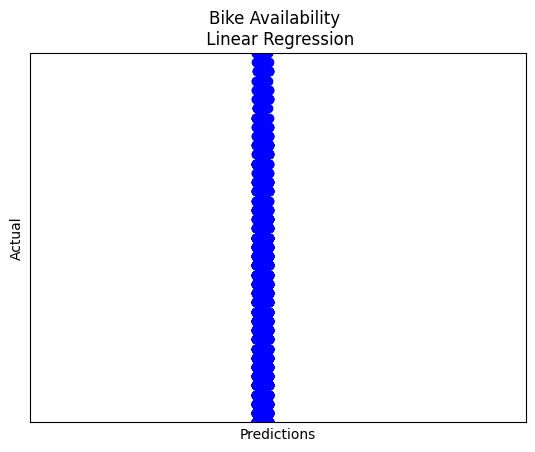

In [49]:
plt.scatter(linreg_predictions, y, color="blue")
#plt.plot(X, treereg_predictions, color="blue", linewidth=3)
plt.title('Bike Availability \n Linear Regression')
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.xlim(0,25)
plt.ylim(0,40)
plt.xticks(())
plt.yticks(())
plt.show()

## Model based on Multiple Regression - multiple features 

In [50]:
X = bikes[features]
y = bikes['bike_available']

#X =bikes[mul_features]
linreg_m = LinearRegression()
linreg_m.fit(X[features], y)

# Print the estimated linear regression coefficients.
print("\nIntercept: \n", linreg_m.intercept_)
print("Features: \n", features)
print("Coeficients: \n", linreg_m.coef_)


Intercept: 
 11.241228268642733
Features: 
 ['weather_main', 'clouds', 'temp', 'weather_id', 'wind_speed', 'temp_feel']
Coeficients: 
 [ 1.09189885e-01  7.35229556e-03  3.49479854e-02 -1.41807629e-05
 -2.52281711e-02 -5.23289803e-02]


## Test the model - Multiple Regression

In [51]:
# Predicted scores
linreg_m_predictions = linreg_m.predict(X).round(0)

actual_vs_predicted_m = pd.concat([y, pd.DataFrame(linreg_m_predictions, columns=['Predicted'], index=y.index)], axis=1)
actual_vs_predicted_m

,bike_available,Predicted
23335,5,12.0
16352,8,12.0
15783,2,11.0
22652,3,12.0
5384,27,12.0
...,...,...
21575,24,12.0
5390,0,12.0
860,15,11.0
15795,10,11.0


In [52]:
# Predicted Bike Availability - Value | Frequency
(unique, counts) = np.unique(linreg_m_predictions, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[1.1000e+01 3.4230e+03]
 [1.2000e+01 1.5857e+04]]


## Plot Results - Multiple Regression

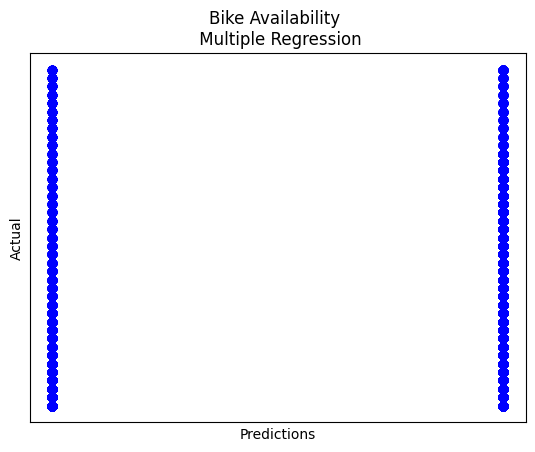

In [53]:
plt.scatter(linreg_m_predictions, y, color="blue")
#plt.plot(X, treereg_predictions, color="blue", linewidth=3)
plt.title('Bike Availability \n Multiple Regression')
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.xticks(())
plt.yticks(())
plt.show()

## Model based on Decision Tree Regressor 

In [54]:
X = bikes[features]
y = bikes['bike_available']
print(len(y))
treereg = DecisionTreeRegressor()
treereg.fit(X, y)

# Print the estimated linear regression coefficients.
#print("\nIntercept: \n", treereg.intercept_)
#print("Features: \n", features)
#print("Coeficients: \n", treereg.coef_)

19280


DecisionTreeRegressor()

In [55]:
# Predicted scores for each example. 
treereg_predictions = treereg.predict(X).round(0)

actual_vs_predicted_tree = pd.concat([y, pd.DataFrame(treereg_predictions, columns=['Predicted'], index=y.index)], axis=1)
actual_vs_predicted_tree

,bike_available,Predicted
23335,5,12.0
16352,8,12.0
15783,2,11.0
22652,3,13.0
5384,27,12.0
...,...,...
21575,24,12.0
5390,0,12.0
860,15,12.0
15795,10,11.0


In [56]:
# Predicted Bike Availability - Value | Frequency
(unique, counts) = np.unique(treereg_predictions, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[9.0000e+00 9.3000e+01]
 [1.0000e+01 9.4300e+02]
 [1.1000e+01 5.5460e+03]
 [1.2000e+01 1.0436e+04]
 [1.3000e+01 2.1650e+03]
 [1.4000e+01 9.6000e+01]
 [2.8000e+01 1.0000e+00]]


## Plot Results - Decision Tree Regressor 

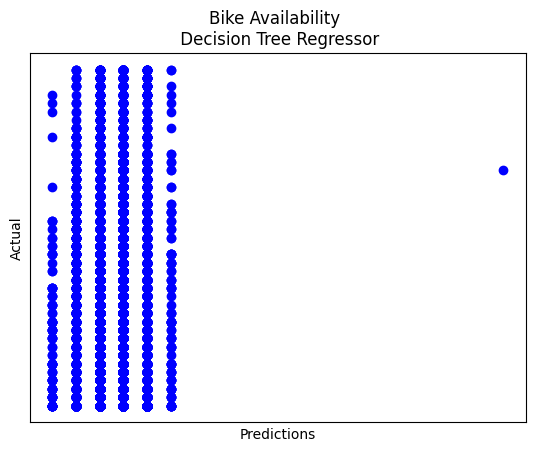

In [57]:
plt.scatter(treereg_predictions, y, color="blue")
#plt.plot(X, treereg_predictions, color="blue", linewidth=3)
plt.title('Bike Availability \n Decision Tree Regressor')
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.xticks(())
plt.yticks(())
plt.show()

## Calculate R2 - Different Models

In [58]:
linreg_mse = mean_squared_error(y,linreg_predictions)
linreg_mser = np.sqrt(linreg_mse).round(2)
print(f'R2 of Linear Regression Model = {linreg_mser}')

linreg_m_mse = mean_squared_error(y,linreg_m_predictions)
linreg_m_mser = np.sqrt(linreg_m_mse).round(2)
print(f'R2 of Multiple Regression Model = {linreg_m_mser}')

treereg_mse = mean_squared_error(y,treereg_predictions)
treereg_mser = np.sqrt(treereg_mse).round(2)
print(f'R2 of Decision Regressor Model = {treereg_mser}')

R2 of Linear Regression Model = 9.67
R2 of Multiple Regression Model = 9.68
R2 of Decision Regressor Model = 9.65
